In [1]:
# y'(t) = f(t, y), t0<=t<=T
# y(t0) = y0

In [2]:
# The order of an ODE is the highest number of derivatives in any of its terms.


In [3]:
# y'''(t) - ty''(t)y'(t) + y'(t) - ty(t) + sin(t) = 0
# y(t0) = y0
# y'(t0) = z0
# y''(t0) = w0

# u1 = y
# u2 = y'
# u3 = y''

# u'1 = u2
# u'2 = u3
# u'3 = tu3u2-u2+tu1-sin(t)

# u(t) = [ u1(t); u2(t); u3(t) ]
# -> first order vector ODE: u'(t) = F(t, u)
# with initial condition: u(t0) = [u1(t0);u2(t0);u3(to)] = [y(t0);y'(t0);y''(t0)]=[y0;z0;w0]=u0
# and
# F(t,u) = F(t, u1, u2, u3) = [u2; u3; tu3u2-u2+tu1-sin(t)]


In [4]:
# Forward Euler formula
# Left endpoint rule
function forward_euler(func, t, y1)
    N = size(t, 1)
    #y = zeros(N, 1)
    y = Array{typeof(y1),1}(undef,N)
    y[1] = y1
    for i=1:N-1
        y[i+1] = y[i] + (t[i+1] - t[i]) * func(t[i], y[i])
    end
    y
end

forward_euler (generic function with 1 method)

In [5]:
# Backward Euler Method
# Right endpoint rule
using Roots
function backward_euler(func, t, y1)
    N = size(t, 1)
    #y = zeros(N, size(y1,1))
    y = Array{typeof(y1),1}(undef,N)
    y[1] = y1
    for i=1:N-1
        ode_eqn = (y_next) -> y_next .- y[i] .- (t[i+1] - t[i]) * func(t[i+1], y_next)
        y[i+1] = fzero(ode_eqn, y[i])
    end
    y
end

backward_euler (generic function with 1 method)

In [6]:
# Crank-Nicolson
# Midpoint rule
# Backward Euler Method
# Right endpoint rule
function crank_nicolson(func, t, y1)
    N = size(t, 1)
    y = Array{typeof(y1),1}(undef,N)
    y[1] = y1
    for i=1:N-1
        ode_eqn = (y_next) -> y_next - y[i] - (t[i+1] - t[i]) * func((t[i]+t[i+1])/2, (y[i]+y_next)/2)
        y[i+1] = fzero(ode_eqn, y[i])
        # y[i+1] =  y[i] + (t[i+1] - t[i]) * func((t[i+1]+t[i])/2, (y[i]+y[i+1])/2)
    end
    y
end

crank_nicolson (generic function with 1 method)

In [7]:
# Runge-Kutta 4
# Simpson Quadrature formula
function rk4(func, t, y1)
    N = size(t, 1)
    y = Array{typeof(y1),1}(undef,N)
    y[1] = y1
    for i=1:N-1
        dt = t[i+1] - t[i]
        K1 = func(t[i], y[i])
        K2 = func(t[i]+(dt/2), y[i] + (dt/2)*K1)
        K3 = func(t[i]+(dt/2), y[i] + (dt/2)*K2)
        K4 = func(t[i] + dt, y[i] + (dt * K3))
        y[i+1] = y[i] + dt * (K1/6 + K2/3 + K3/3 + K4/6)
    end
    y
end

rk4 (generic function with 1 method)

In [8]:
t = [n for n=0:((2.5-0)/1000):2.5]
print(size(t,1))
ode_func1(t, y) = -1.2y + 7*exp(-0.3t)


1001

ode_func1 (generic function with 1 method)

In [9]:
forward_euler(ode_func1, t, 3.0)

1001-element Array{Float64,1}:
 3.0
 3.0085
 3.016961379920645
 3.025384265458543
 3.0337687819258385
 3.04211505425137
 3.0504232069818262
 3.0586933642828984
 3.066925649940427
 3.07512018736155
 3.0832770995758403
 3.0913965092364477
 3.0994785386212316
 ⋮
 3.459226199007747
 3.4571834150963863
 3.4551405107093487
 3.4530974908929246
 3.4510543606747532
 3.4490111250638815
 3.4469677890508224
 3.4449243576076114
 3.442880835687868
 3.4408372282268505
 3.438793540141515
 3.4367497763305734

In [10]:
backward_euler(ode_func1, t, 3.0)

1001-element Array{Float64,1}:
 3.0
 3.0084614954343416
 3.016884611278167
 3.0252694721254616
 3.0336162021902
 3.0419249253074883
 3.050195764934702
 3.0584288441526217
 3.066624285666566
 3.0747822118075185
 3.0829027445332535
 3.0909860054294587
 3.0990321157108514
 ⋮
 3.4578639134706908
 3.455825084076712
 3.4537861274101855
 3.4517470485191355
 3.449707852432989
 3.4476685441626334
 3.4456291287004737
 3.4435896110204913
 3.4415499960783023
 3.439510288811214
 3.4374704941382817
 3.4354306169603683

In [11]:
crank_nicolson(ode_func1, t, 3.0)

1001-element Array{Float64,1}:
 3.0
 3.008480717653834
 3.0169229357438048
 3.0253267794135703
 3.03369237342456
 3.0420198421571243
 3.0503093096116816
 3.058560899409862
 3.0667747347956476
 3.0749509386365093
 3.0830896334245397
 3.091190941277584
 3.099254983940365
 ⋮
 3.458545633599278
 3.456504827593618
 3.4544638977072557
 3.45242284898737
 3.450381686462514
 3.448340415142676
 3.446299040019335
 3.444257566065521
 3.4422159982358718
 3.4401743414666908
 3.4381326006760045
 3.43609078076362

In [12]:
rk_ans = rk4(ode_func1, t, 3.0)

1001-element Array{Float64,1}:
 3.0
 3.0084807084371037
 3.0169229173689325
 3.025326751938874
 3.033692336908088
 3.0420197966566556
 3.0503092551847284
 3.05856083611367
 3.0667746626871963
 3.0749508577725146
 3.0830895438614547
 3.0911908430715984
 3.099254877147408
 ⋮
 3.45854537046854
 3.4565045654145177
 3.4544636364780588
 3.452422588706342
 3.4503814271279225
 3.4483401567527876
 3.446298782572418
 3.444257309559844
 3.4422157426697044
 3.440174086838303
 3.4381323469836675
 3.4360905280056055

In [13]:
@time forward_euler(ode_func1, t, 3.0)
@time backward_euler(ode_func1, t, 3.0)
@time crank_nicolson(ode_func1, t, 3.0)
@time rk4(ode_func1, t, 3.0)
println()

  0.000013 seconds (1 allocation: 8.000 KiB)
  0.006500 seconds (80.79 k allocations: 3.617 MiB)
  0.006110 seconds (79.67 k allocations: 3.626 MiB)
  0.000038 seconds (1 allocation: 8.000 KiB)



In [14]:
ode_func2(t,y) = -0.8*y.^1.5 + 20000*(1-exp(-3*t))

ode_func2 (generic function with 1 method)

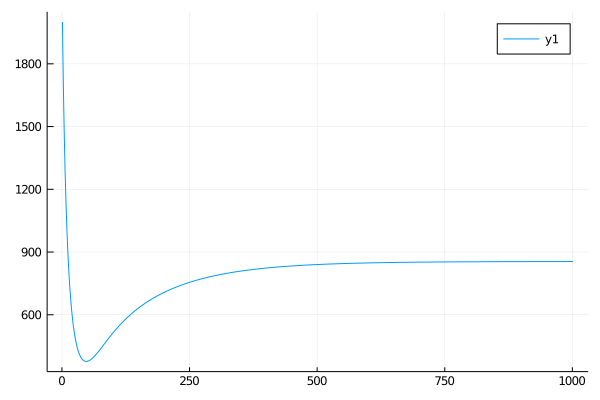

In [15]:
t2 = [n for n in 0:.0001:0.5]

using Plots
plot(forward_euler(ode_func2, t, 2000.0))

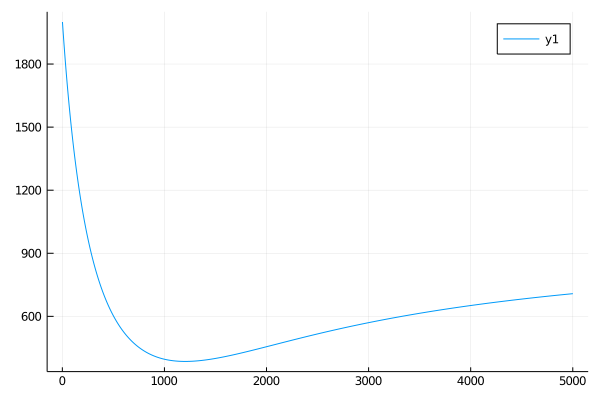

In [16]:
plot(rk4(ode_func2, t2, 2000.0))

In [17]:
actual_answer(t) = (70/9)exp(-0.3t)-(43/9)exp(-1.2t)

actual_answer (generic function with 1 method)

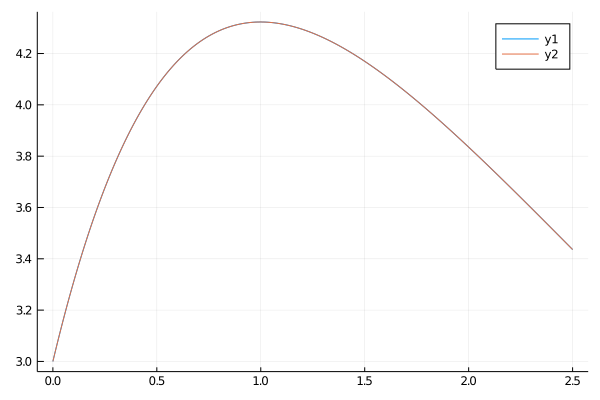

In [18]:
actual = [actual_answer(ti) for ti in t]
plot(t, actual)
plot!(t, rk4(ode_func1, t, 3.0))

In [19]:
maximum(abs.(actual .- rk_ans))

9.894307595459395e-13

In [20]:
actual_answer(2.5) - rk_ans[end]

2.7000623958883807e-13

In [21]:
# using Pkg
# Pkg.add("DifferentialEquations")
using DifferentialEquations

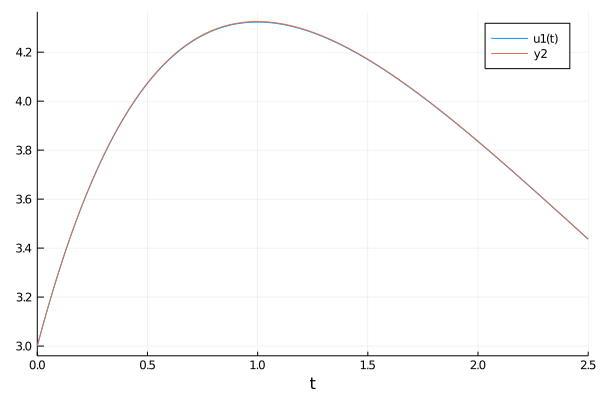

In [22]:
ode_func3(t, null, y) = ode_func1(y, t)
prob = ODEProblem(ode_func3, 3, (0, 2.5))
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
plot(sol)
plot!(t, forward_euler(ode_func1, t, 3.0))

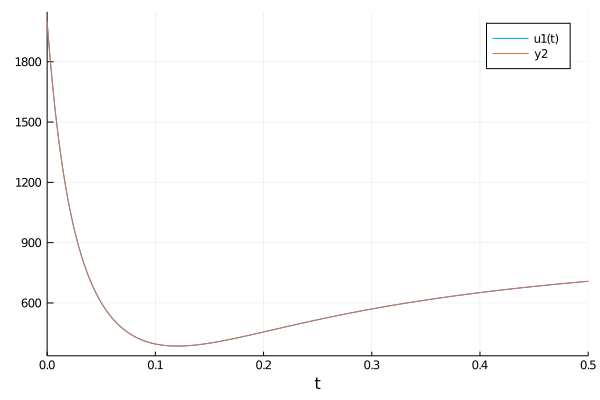

In [23]:
ode_func4(t, null, y) = ode_func2(y,t)
prob2 = ODEProblem(ode_func4, 2000, (0, 0.5))
sol = solve(prob2,BS3(),reltol=1e-8,abstol=1e-8)
func2_rk4 = rk4(ode_func2, t2, 2000.0)
plot(sol)
plot!(t2, func2_rk4)

In [24]:
function ode_func5(u,t)
    du = Array{Float64,1}(undef, 3)
    du[1] = u[2]
    du[2] = u[3]
    du[3] = (t^-1)*u[3]-3*(t^-2)*u[2]+4*(t^-3)*u[1]+5*log(t)+9*(t^-1)
    du
end

ode_func5 (generic function with 1 method)

In [25]:
function ode_func8(t,u)
    du = Array{Float64,1}(undef, 3)
    du[1] = u[2]
    du[2] = u[3]
    du[3] = (t^-1)*u[3]-3*(t^-2)*u[2]+4*(t^-3)*u[1]+5*log(t)+9*(t^-1)
    du
end

ode_func8 (generic function with 1 method)

In [26]:
t3 = [n for n=1:(2-1)/1000:2]
fw_test = forward_euler(ode_func8, t3, [0.0;1.0;3.0])
# Works now

1001-element Array{Array{Float64,1},1}:
 [0.0, 1.0, 3.0]
 [0.0009999999999998899, 1.0029999999999997, 3.008999999999999]
 [0.0020030000000000017, 1.006009, 3.0180029975076494]
 [0.0030090089999998907, 1.0090270029975072, 3.0270089755961953]
 [0.004018036002997511, 1.0120540119731039, 3.0360179174390516]
 [0.005030090014970503, 1.0150900298905425, 3.045029806309183]
 [0.006045180044861159, 1.0181350596968521, 3.0540446255785176]
 [0.007063315104557899, 1.0211891043224304, 3.063062358717333]
 [0.008084504208880443, 1.0242521666811482, 3.0720829892936785]
 [0.009108756375561479, 1.0273242496704416, 3.0811065009727696]
 [0.010136080625232035, 1.0304053561714146, 3.090132877516417]
 [0.011166485981403336, 1.0334954890489307, 3.0991621027824285]
 [0.012199981470452382, 1.0365946511517135, 3.108194160724047]
 ⋮
 [3.9563412610389954, 8.558611948420593, 12.384672113165301]
 [3.964899872987415, 8.570996620533757, 12.394382760772135]
 [3.97347086960795, 8.58339100329453, 12.404093851333622]
 [3.9

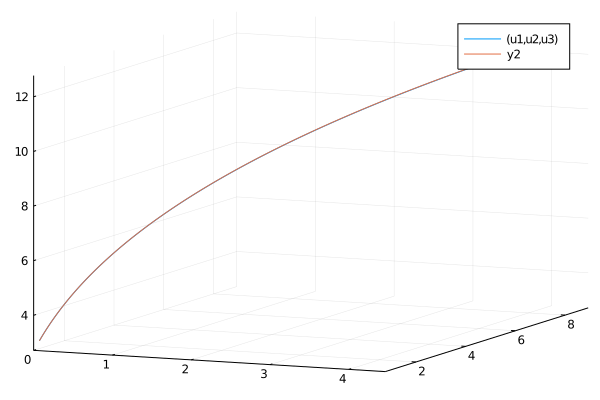

In [27]:
ode_func6(t, null, y) = ode_func8(y, t)
prob2 = ODEProblem(ode_func6, [0; 1; 3], (1, 2))
sol = solve(prob2,BS3(),reltol=1e-8,abstol=1e-8)
plot(sol, vars=(1,2,3))
plot!([data[1] for data in fw_test], [data[2] for data in fw_test], [data[3] for data in fw_test], vars=(1,2,3))


In [28]:
sol

retcode: Success
Interpolation: 3rd order Hermite
t: 263-element Array{Float64,1}:
 1.0
 1.000316563507678
 1.000839432535072
 1.0015668326869882
 1.0025486874988665
 1.0037749716084325
 1.005253430785573
 1.0069632530069845
 1.0088887836304714
 1.011004643389162
 1.0132881517568693
 1.0157154525134158
 1.0182655184675395
 ⋮
 1.9474468538928031
 1.9525805315260127
 1.957729103145857
 1.9628926339126298
 1.9680711882715245
 1.973264830977244
 1.9784736270956906
 1.9836976416586825
 1.988936939661599
 1.9941915864100137
 1.9994616468212798
 2.0
u: 263-element Array{Array{Float64,1},1}:
 [0.0, 1.0, 3.0]
 [0.0003167138739450371, 1.0009501414949387, 3.0028492217979346]
 [0.0008404903928503039, 1.0025214688120732, 3.007555948112214]
 [0.0015705209044768876, 1.0047115473211559, 3.0141051657564577]
 [0.0025584560495928695, 1.0076753018811893, 3.0229478844697057]
 [0.003796427941581201, 1.0113890684292106, 3.0339959685209092]
 [0.005295046162218892, 1.0158845577257567, 3.047321867254743]
 [0.00

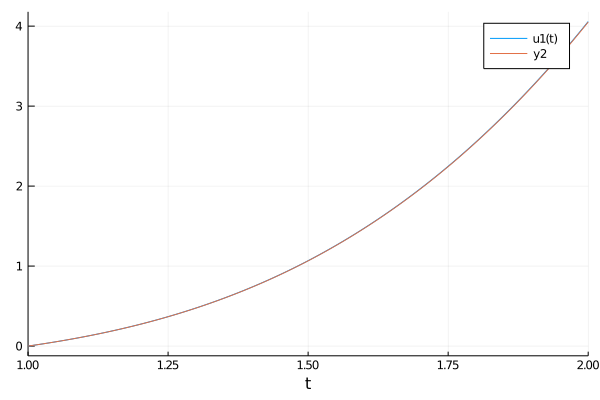

In [30]:
plot(sol, vars=(0,1))
plot!(t3, [data[1] for data in fw_test])
# Matches book!

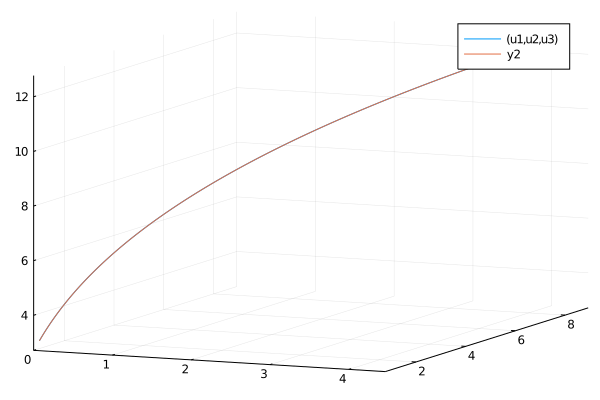

In [31]:
rk4_test = rk4(ode_func8, t3, [0.0;1.0;3.0])
plot(sol, vars=(1,2,3))
plot!([data[1] for data in rk4_test], [data[2] for data in rk4_test], [data[3] for data in rk4_test], vars=(1,2,3))

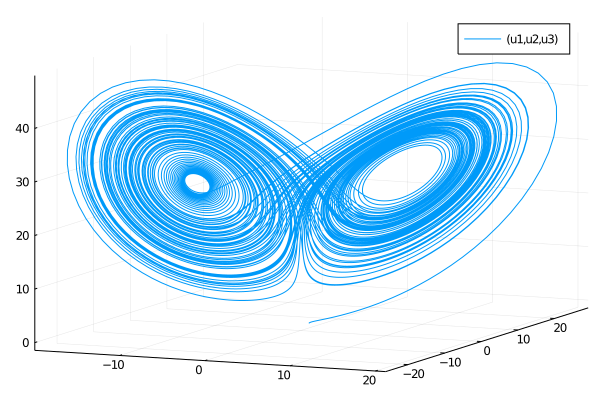

In [34]:
function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob)
plot(sol,vars=(1,2,3))

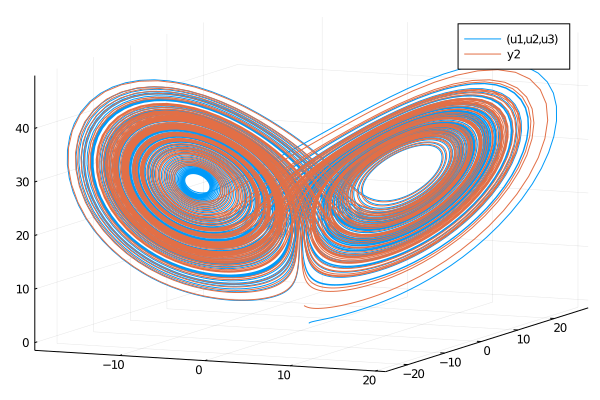

In [35]:
function myfunc9(t, u)
    du = Array{Float64,1}(undef, 3)
    du[1] = 10.0*(u[2]-u[1])
    du[2] = u[1]*(28.0-u[3]) - u[2]
    du[3] = u[1]*u[2] - (8/3)*u[3]
    du
end
t4 = [t for t=0.0:(100-0)/10000:100.0]
lorenz_test = rk4(myfunc9, t4, [0.0;1.0;3.0])
plot!([data[1] for data in lorenz_test], [data[2] for data in lorenz_test], [data[3] for data in lorenz_test], vars=(1,2,3))
# Done with book!